In [32]:
import numpy as np
import scipy.interpolate as si
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
import requests
#from google.colab.patches import cv2_imshow
import cv2
colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k')
def bspline(cv, n=100, degree=3, periodic=False):
    """ Calculate n samples on a bspline

        cv :      Array ov control vertices
        n  :      Number of samples to return
        degree:   Curve degree
        periodic: True - Curve is closed
                  False - Curve is open
    """

    # If periodic, extend the point array by count+degree+1
    cv = np.asarray(cv)
    count = len(cv)

    if periodic:
        factor, fraction = divmod(count+degree+1, count)
        cv = np.concatenate((cv,) * factor + (cv[:fraction],))
        count = len(cv)
        degree = np.clip(degree,1,degree)

    # If opened, prevent degree from exceeding count-1
    else:
        degree = np.clip(degree,1,count-1)


    # Calculate knot vector
    kv = None
    if periodic:
        kv = np.arange(0-degree,count+degree+degree-1,dtype='int')
    else:
        kv = np.concatenate(([0]*degree, np.arange(count-degree+1), [count-degree]*degree))


    # Calculate query range
    u = np.linspace(periodic,(count-degree),n)


    # Calculate result
    return np.array(si.splev(u, (kv,cv.T,degree))).T

In [33]:
#txthh = requests.get('https://raw.github.com/anderborba/mb2021/Data/image_hh.txt')
url = 'https://raw.githubusercontent.com/anderborba/mb2021/main/Data/image_hh.txt'
print(url)

https://raw.githubusercontent.com/anderborba/mb2021/main/Data/image_hh.txt


In [37]:
IMGhhpandas = pd.read_csv(url, sep=" ", header = None)
IMGhh = IMGhhpandas.to_numpy()
dim = IMGhh.shape
#print(IMGhh)
m = dim[0] - 1
n = dim[1] - 2
IMGhhaux = np.zeros((m, n))
for i in range(0, m):
  for j in range(0, n):
    IMGhhaux[i, j] = 255 * IMGhh[i, j]
#IMGhhgray = cv2.cvtColor(IMGhhaux, cv2.COLOR_BGR2GRAY)
#IMGhh = cv2.fromarray(IMGhh)
cv2.imshow(IMGhhaux)


NameError: name 'Mat' is not defined

In [2]:
cv = np.array([[ 50.,  25.],
   [ 59.,  12.],
   [ 50.,  10.],
   [ 57.,   2.],
   [ 40.,   4.],
   [ 40.,   14.]])
print(cv)

[[50. 25.]
 [59. 12.]
 [50. 10.]
 [57.  2.]
 [40.  4.]
 [40. 14.]]


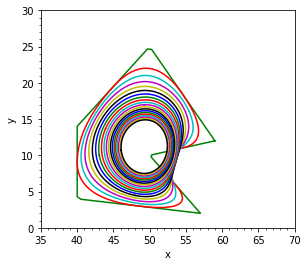

In [7]:
for d in range(1,21):
    p = bspline(cv,n=100,degree=d,periodic=True)
    x,y = p.T
    plt.plot(x,y,'k-',label='Degree %s'%d,color=colors[d%len(colors)])

plt.minorticks_on()
#plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(35, 70)
plt.ylim(0, 30)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()